#Gathering Data


**Importing all the necessary libraries**

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Reading the dataset**

In [0]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

**Displaying the dataset**

In [3]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Assessing the dataset

**Check dimensions of the dataframe in terms of rows and columns**

In [4]:
train_df.shape


(891, 12)

Inference drawn:

* The no.of rows are 891
* The no.of columns are 12

**Checking if the dataset has any duplicate values**

In [5]:
sum(train_df.duplicated())


0


Inference drawn:

* The dataset has no duplicate values

**Checking if datatypes are in correct format**

In [6]:
train_df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Inference drawn:

* Age's data type is float but to make it easy to use for the user, we can convert it in int format
* Fare's data type is float but to make it easy to use for the user, we can convert it in int format
* Ticket column looks like a reductant column and could be dropped
* Name column looks like a reductant column and could be dropped
* Having two columns 'SibSp' and 'Parch', both indicating same thing, number of family members is reductant and could be both combined to a single column 

**Checking if there are any null or missing values in the dataset**

In [7]:
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Inference drawn:

* Cabin column has large amount of data missing and could be dropped
* Age has lesser amount of data missing and those missing values could be filled with mean, or generating random numbers between mean and standard deviation
* Embarked has very few data missing and could be replaced with mode

**Verifying what percent of data is missing**

In [8]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


Inference drawn:

* Cabin column has 77.1% of data missing and could be dropped
* Age has 19.9% of data missing and those missing values could be filled with mean, or generating random numbers between mean and standard deviation
* Embarked has 0.2% of data missing and could be replaced with mode

#Cleaning data

**Handling missing data**

For column 'Embarked'

In [9]:
train_df['Embarked'].describe()


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

Inference drawn:
* S has the highest frequency of occurence with S occuring ore than 60% of time
* Thus 0.2% of missing data is most likely to have S

Replacing null values with the mode

In [0]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

Verifying if the column 'Embarked' still has null values or no

In [11]:
train_df["Embarked"].isnull().sum()

0

Inference drawn:

* All null values in column 'Embarked' are successfully replaced

For column Age

Replacing null values in Age column with random values generated between the mean and standard deviation


In [0]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)


Verifying if the column 'Age' still has null values or no

In [13]:
train_df["Age"].isnull().sum()

0

Inference drawn:

* All null values in column 'Age' are successfully replaced

For column 'Cabin'

Dropping the columnn since it has a large amount of data missing

In [0]:

train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

**Dropping reductant columns**

Analyzing column 'Name'

In [15]:
train_df['Name'].describe()

count                                 891
unique                                891
top       Sandstrom, Miss. Marguerite Rut
freq                                    1
Name: Name, dtype: object

Inference drawn:

* Since 'Name' column has all unique values it looks like a reductant column and could be dropped



Analyzing column 'Ticket'

In [16]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Inference drawn:

* Since 'Ticket' column has majority of unique values it looks like a reductant column and could be dropped



Analyzing column 'Passenger ID'

In [17]:
train_df['PassengerId'].nunique()

891

Inference drawn:

* Since 'Passenger ID' column has all unique values it looks like a reductant column and could be dropped

In [0]:
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

Verifying

In [19]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


Having two columns 'SibSp' and 'Parch', both indicating same thing, number of family members is reductant and could be both combined to a single column 

In [0]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
train_df = train_df.drop(['SibSp', 'Parch'], axis=1)
test_df = test_df.drop(['SibSp', 'Parch'], axis=1)


**Correcting the data types**

In [21]:
train_df.dtypes

Survived       int64
Pclass         int64
Sex           object
Age            int64
Fare         float64
Embarked      object
relatives      int64
dtype: object

Inference drawn

* Fare's data type is float but to make it easy to use for the user, we can convert it in int format

In [0]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

**Converting columns having object data types to numerical equivalent for ease**

For column 'Sex'

In [0]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

For column 'Embarked'

In [0]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

#Analyzing the data

**Does gender influence one's survival rate?**

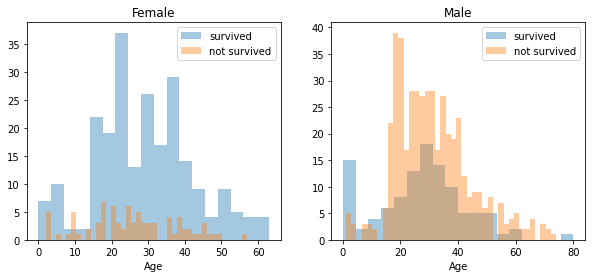

In [25]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']==1]
men = train_df[train_df['Sex']==0]
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')


Inference drawn:

* The plot clearly confirms that majority on women survived on the R.M.S. Titanic while the same doesn’t apply for the males. Males, especially between the age group of 20–40 had a higher chance of not surviving.
* Thus it does prove that gender did impact one’s survival on the titanic

**Do wealthy people have a higher chance of survival?**

There was no direct way to measure one’s wealth. But it could be estimated from the class an individual is travelling in. There were 3 passenger classes on R.M.S. Titanic 

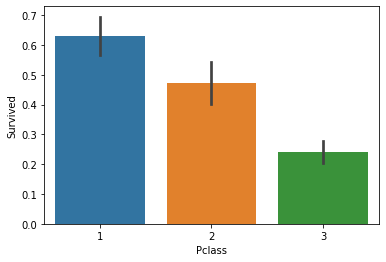

In [26]:
sns.barplot(x='Pclass', y='Survived', data=train_df)


Inference drawn:

* The graph above clearly indicates that wealth does play an impact on one’s survival.
* Approximately 62% people from first class survived, whereas around 48% people from second class survived.
* The percentage of people surviving from 3rd class is less than half the percentage of people surviving from first class with only 25% people surviving


**Do people with a larger family have more chances of survival?**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


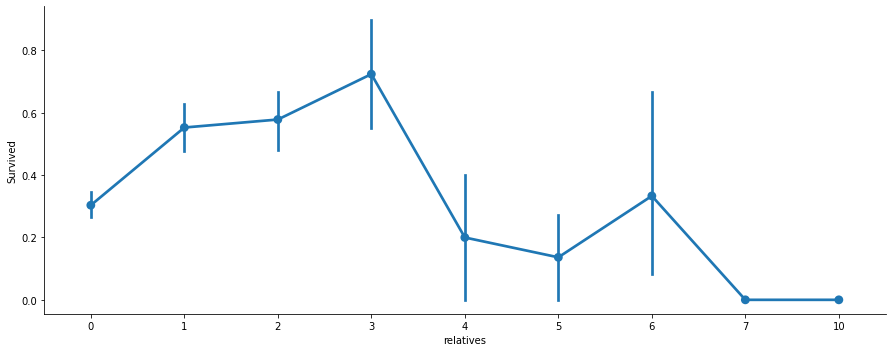

In [27]:
axes = sns.factorplot('relatives','Survived', data=train_df, aspect = 2.5, )


Inference drawn:

* The plot above shows the chances of one’s survival with respect to the number of family members an individual has
* People travelling solo have less chances of survival as compared to people travelling with upto 3 family members. However the same does not hold true as number of family members increase.
* People having 4 or more family members have less chances of survival


**Does the port one embarked from influence one's survival rate?**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


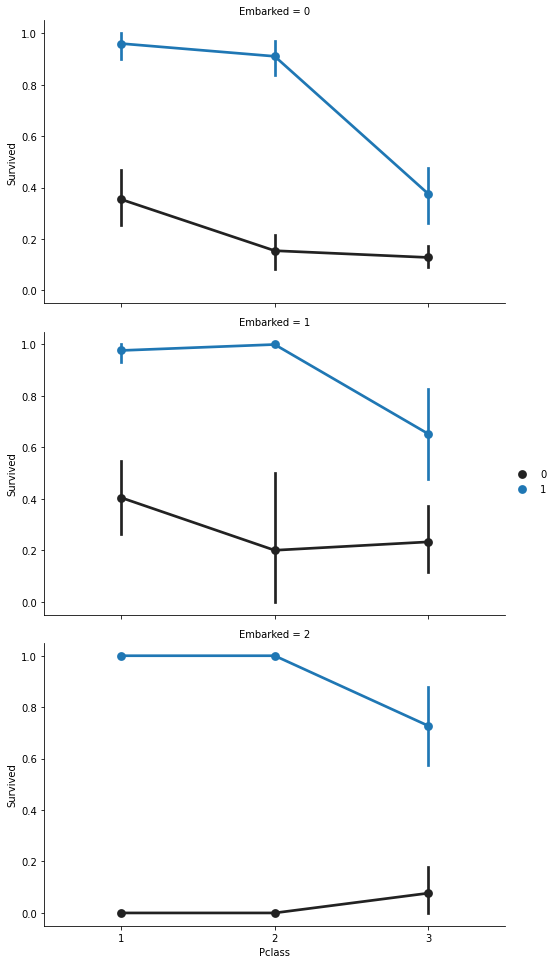

In [28]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Inference drawn:

* It shows 0 for males and 1 for females
* It shows graphs of males and females who boarded the R.M.S. titanic from port S,P and Q i.e. 0,1,and 2 respectively ans shows where they suirvived or no
* The correlation is easily seen in the above graphs

#Modelling the data

Normalizing age column

In [0]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

Verifying the step above

In [30]:
train_df['Age'].value_counts()


4    164
6    161
5    152
3    131
2    116
1     99
0     68
Name: Age, dtype: int64

Normalizing the 'Fare' column

In [0]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

Verifying the step above

In [32]:
train_df['Fare'].value_counts()


0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

Displaying the data set

In [33]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,relatives
0,0,3,0,2,0,0,1
1,1,1,1,5,3,1,1
2,1,3,1,3,0,0,0
3,1,1,1,5,3,0,1
4,0,3,0,5,1,0,0


**Splitting into training and testing data**

In [0]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df

**Applying Random Forest Classifier**

In [0]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

**Applying Logistic Regression Classifier**

In [0]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

**Applying K Nearest Neighbour Classifier**

In [0]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train) 
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

**Applying Gaussian Naive Bayes Classifier**

In [0]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train) 
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

**Applying Linear SVC**

In [39]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**Applying Decision Tree**

In [0]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

**Analyzing which model has most accuracy**

In [41]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(7)

,Model
Score,
90.01,Random Forest
90.01,Decision Tree
86.87,KNN
80.58,Logistic Regression
80.25,Support Vector Machines
77.78,Naive Bayes


Inference:

* Thus, Random Forest classifier and Decision Tree has the majority accuracy of 90.01%